In [1]:
# Automatically adjust notebook width
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# Allow interactive dislay of matplotlib features
%matplotlib ipympl

In [3]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from pathlib import Path
from scipy.interpolate import griddata

In [4]:
### Utility functions ###

# Function to read/parse data
def read_input_data(path2data):
    arr = np.loadtxt(path2data)
    lon, lat, val = np.transpose(arr)
    return lon, lat, val

# Function to plot the interpolation results
def scatter_plot(fig, ind, data, model, title):
    lat, lon, vals = data
    grid_x, grid_y, grid_z =  model
    ax = fig.add_subplot(int(f"13{ind}"), projection='3d')
    ax.plot_surface(grid_x, grid_y, grid_z, cmap=cm.coolwarm, linewidth=0, antialiased=False, shade=False, label='model')
    ax.scatter(lat, lon, vals, color='black', s=40, label='data')
    ax.legend(loc="upper left", prop={'size': 7})
    ax.set_xlabel('Latitude (°)')
    ax.set_ylabel('Longitude (°)')
    ax.set_zlabel('Value')
    ax.title.set_text(title)

In [5]:
# Setting path to input dataset
path2data = Path('./dataset/point_location.dat')

In [6]:
# Reading the data
lon, lat, vals = read_input_data(path2data)

# Creating the spatial grid
lat_range = np.linspace(10.0, 16.0, 50)
lon_range = np.linspace(121.0, 131.0, 70)
grid_x, grid_y = np.meshgrid(lat_range, lon_range)

# Interpolating the data trying three different interpolation methods
points = list(zip(lat, lon))
grid_z1 = griddata(points, vals, (grid_x, grid_y), method='nearest')
grid_z2 = griddata(points, vals, (grid_x, grid_y), method='linear')
grid_z3 = griddata(points, vals, (grid_x, grid_y), method='cubic')

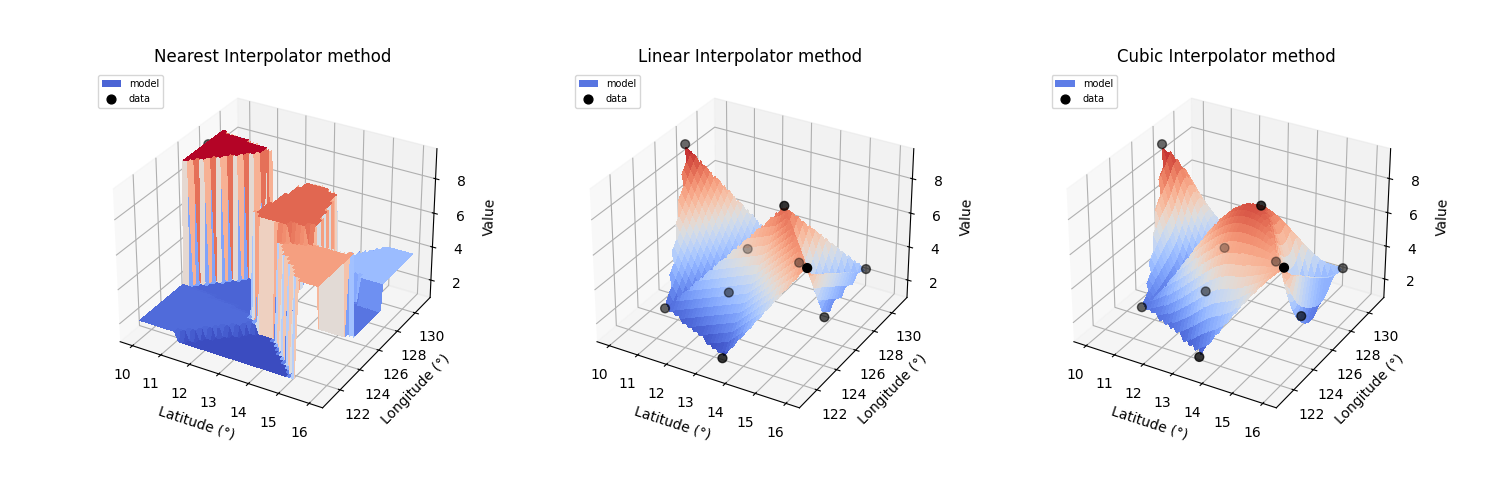

In [7]:
# Plotting results for the three interpolation methods
plt.close()
fig = plt.figure(figsize=(15, 5))
scatter_plot(fig, 1, data=[lat, lon, vals], model=[grid_x, grid_y, grid_z1], title='Nearest Interpolator method')
scatter_plot(fig, 2, data=[lat, lon, vals], model=[grid_x, grid_y, grid_z2], title='Linear Interpolator method')
scatter_plot(fig, 3, data=[lat, lon, vals], model=[grid_x, grid_y, grid_z3], title='Cubic Interpolator method')
fig.tight_layout(pad=5.0)
plt.show()